Wilshire Liu and Joseph Chin

# Business Data Science 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
import scipy.stats as st
from sklearn import linear_model

# Question 1

In [2]:
df1 = pd.read_csv('DF1', index_col=0)
df1.head(10)

0         1         2         3
0  1.038502  0.899865  0.835053 -0.971528
1  0.320455 -0.647459  0.149079  0.352593
2  0.055480  2.234771  0.271672 -2.108739
3 -0.007260 -0.524299 -0.126550  0.670827
4 -1.237390 -1.377017 -1.049932  1.342079
5  0.477841  0.032660  0.336723 -0.171675
6 -0.486923 -1.128336 -0.459850  1.113013
7  0.313020  0.677323  0.123082 -0.617958
8  0.919790 -0.539665  0.956577  0.821389
9  0.574238 -1.024339  0.471622  1.006623

In [3]:
pd.DataFrame(df1.corr())

0         1         2         3
0  1.000000 -0.003998  0.990066  0.004111
1 -0.003998  1.000000 -0.004085 -0.990235
2  0.990066 -0.004085  1.000000  0.004067
3  0.004111 -0.990235  0.004067  1.000000

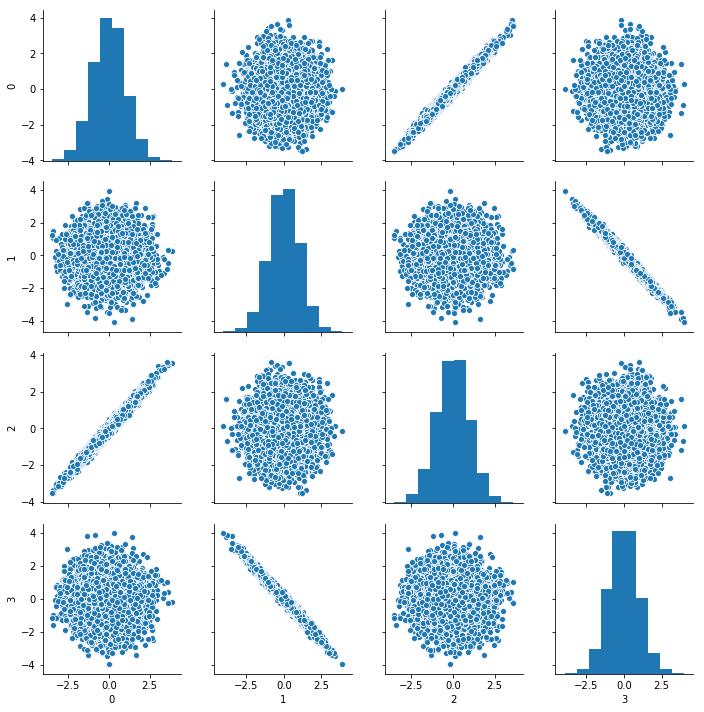

In [4]:
sns.pairplot(df1)
sns.despine()

In [5]:
print('Columns 0 and 2, 1 and 3 are highly correlated.')

Columns 0 and 2, 1 and 3 are highly correlated.


$$
Cov(X, Y) = \frac{\sum(X_i-\bar{X})(Y_i-\bar{Y})}{n - 1}
$$

In [6]:
pd.DataFrame(df1.cov())

0         1         2         3
0  1.001558 -0.004012  0.991624  0.004125
1 -0.004012  1.005378 -0.004099 -0.995457
2  0.991624 -0.004099  1.001589  0.004081
3  0.004125 -0.995457  0.004081  1.005168

In [7]:
print('The covariance matches with the correlations --> columns 0 and 2 have a high positive correlation, which is also \t shown by the positive covariance value, and columns 1 and 3 have a high negative correlation, which is also shown by the negative covariance value.')


The covariance matches with the correlations --> columns 0 and 2 have a high positive correlation, which is also 	 shown by the positive covariance value, and columns 1 and 3 have a high negative correlation, which is also shown by the negative covariance value.


In [8]:
mean = [0, 0, 0]
cov = [[1, 0, 0], 
       [0, 1, 1], 
       [0, 1, 1]]
dist = np.random.multivariate_normal(mean, cov, 1000)

In [9]:
df2 = pd.DataFrame(dist)
#df2.head(10)
pd.DataFrame(df2.cov())

0         1         2
0  0.979565  0.008506  0.008506
1  0.008506  1.012556  1.012556
2  0.008506  1.012556  1.012556

C:\Users\Wilshire\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Wilshire\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6641: RuntimeWarning: Degrees of freedom <= 0 for slice
  baseCov = np.cov(mat.T)
C:\Users\Wilshire\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Wilshire\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


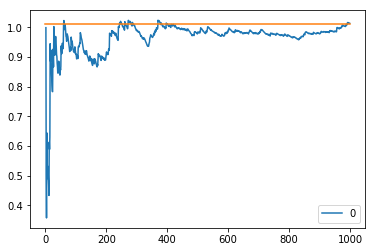

In [10]:
cov_list = []
for i in range(1000):
    cov = pd.DataFrame(dist[:i]).cov().iloc[2, 1] #or do pd.DataFrame??
    cov_list.append(cov)

pd.DataFrame(cov_list).plot()

x = range(1000)
y = []
for k in x:
     y.append(df2.cov().iloc[2, 1])
        
plt.plot(x, y)

# Question 3

In [11]:
errors = []

for e in range(100):
    X = np.random.normal(0, 1, 150)
    E = np.random.normal(0, 1, 150)
    B0 = -3
    B = 0
    Y = B0 + np.multiply(X, B) + E

    lr = linear_model.LinearRegression()
    X = X.reshape(-1, 1)
    lr.fit(X, Y)
    
    errors.append(lr.coef_[0] - B)
    #print(lr.coef_, lr.intercept_)

In [12]:
#print(errors)
errors = np.asarray(errors)
print(errors.mean())
print(errors.std())

-0.007785852992324892
0.08789460627277197


In [13]:
z_score = (-0.15 - 0)/errors.std()
print(z_score)

-1.7065893615188428


In [14]:
prob = st.norm.cdf(z_score)
if prob <= 0.05:
    print("A B-hat of -0.15 is statistically significant because the p-value of " + str(st.norm.cdf(z_score)) + " is less than .05")
else:
    print("A B-hat of -0.15 is not statistically significant because the p-value of " + str(st.norm.cdf(z_score)) + " is greater than .05")

A B-hat of -0.15 is statistically significant because the p-value of 0.04394920195392395 is less than .05


In [15]:
values = []
x = range(10,100)

for i in x:
    
    errors = []
    for e in range(100):
        X = np.random.normal(0, 1, i)
        E = np.random.normal(0, 1, i)
        B0 = -3
        B = 0
        Y = B0 + np.multiply(X, B) + E

        lr = linear_model.LinearRegression()
        X = X.reshape(-1, 1)
        lr.fit(X, Y)

        errors.append(lr.coef_[0] - B)

    errors = np.asarray(errors)
    values.append(errors.std())
print(values)

[0.38881900110773154, 0.38584579349011844, 0.30358878312950605, 0.31025261656534614, 0.26623895372656975, 0.2930477252247841, 0.3033211834840999, 0.2708232599532664, 0.27808066583174507, 0.242423030129902, 0.21643635120372068, 0.2429599146858816, 0.21316004884131468, 0.19637898811216586, 0.20160378522663372, 0.21488005703751026, 0.21915999280124093, 0.21582558135891344, 0.20495436705700817, 0.2301730502479192, 0.18090820247605235, 0.19068907225767226, 0.20896786697270844, 0.1688865009334541, 0.16684478333596647, 0.18581574378434354, 0.1616076386095626, 0.1663958143473092, 0.16459344695081735, 0.16562383130755698, 0.16581999045302817, 0.17102886153557195, 0.16078028524573204, 0.15259654993711505, 0.1579620282550702, 0.15015645920195356, 0.16928406089006498, 0.16053074396455874, 0.1498516765600562, 0.15361804061921944, 0.14778670401119082, 0.1564098193150546, 0.13476649202605817, 0.14108629197041736, 0.12720946861217194, 0.14871154571017445, 0.12980730242557584, 0.1320678462561617, 0.128

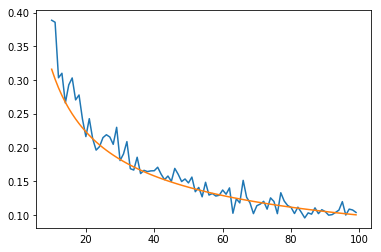

In [16]:
#plt2 = pd.DataFrame(values[1:]).plot()
plt.plot(x, values)

y = []
for k in x:
    y.append(1/math.sqrt(k))

plt.plot(x, y)

# Question 4

In [17]:
def displayTopK(year, k):
    
    filepath = "Names/yob" + str(year) + ".txt"
    
    df4 = pd.read_csv(filepath, header=None)
    df4 = df4.sort_values(by=2, ascending=False)
    
    return df4.head(k)

In [18]:
displayTopK(1997, 5)

0  1      2
16157      Michael  M  37545
16158        Jacob  M  34145
16159      Matthew  M  31512
16160  Christopher  M  29101
16161       Joshua  M  28282

In [19]:
def nameFrequency(year, name):
    
    filepath = "Names/yob" + str(year) + ".txt"
    df5 = pd.read_csv(filepath, header=None)
    
    criteria = df5[0] == name
    
    return df5[criteria]

In [20]:
nameFrequency(1997, 'William')

0  1      2
4235   William  F     26
16175  William  M  20008

In [21]:
def nameRelativeFrequency(year, name):
    
    filepath = "Names/yob" + str(year) + ".txt"
    df6 = pd.read_csv(filepath, header=None)
    
    criteria = df6[0] == name
    maleNames = df6[1] == 'M'
    femaleNames = df6[1] == 'F'
    
    totalMaleNames = df6[maleNames][2].sum()
    totalFemaleNames = df6[femaleNames][2].sum()
    
    df6Male = df6[maleNames].apply(lambda x : x/totalMaleNames if x.name == 2 else x)
    df6Female = df6[femaleNames].apply(lambda x : x/totalFemaleNames if x.name == 2 else x)
    
    frames = df6Male, df6Female
    df6 = pd.concat(frames)
    
    return df6[criteria]

In [22]:
nameRelativeFrequency(1995, 'Joseph')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


0  1         2
15765  Joseph  M  0.013316
2165   Joseph  F  0.000035

In [29]:
filesDict = {}
for year in range(1880,2016):
    filepath = "Names/yob" + str(year) + ".txt"
    data = pd.read_csv(filepath, header=None)
    filesDict[year] = data
    

In [30]:
Names = []
for file in filesDict.values():
    for name in file[0]:
        if name not in Names:
            Names.append(name)

In [31]:
len(Names)

95025

In [ ]:
namesThatFlipped = []
#testNames = ['Sarah', 'Courtney']
for name in Names:
    yearDict = {}
    for year in range(1880,2016):
        frequencies = nameFrequency(year, name)
        if len(frequencies) == 0:
            yearDict[year] = None
        elif len(frequencies) > 1:
            if frequencies[2].iloc[0] > frequencies[2].iloc[1]:
                yearDict[year] = frequencies[1].iloc[0]
            else:
                yearDict[year] = frequencies[1].iloc[1]
        else:
            yearDict[year] = frequencies[1].iloc[0]

    if 'M' in yearDict.values() and 'F' in yearDict.values():
        namesThatFlipped.append(name)

#year = 1881
#filepath = "Names/yob" + str(year) + ".txt"
#df7 = pd.read_csv(filepath, header=None)
#df7


#d8 = pd.DataFrame()

In [39]:
print(namesThatFlipped)

['Courtney']


# Question 5

In [23]:
from statsmodels.formula.api import ols
kidiq = pd.read_stata('kidiq.dta')

In [24]:
kidiq.head(5)

kid_score  mom_hs      mom_iq  mom_work  mom_age
0         65     1.0  121.117529         4       27
1         98     1.0   89.361882         4       25
2         85     1.0  115.443165         4       27
3         83     1.0   99.449639         3       25
4        115     1.0   92.745710         4       27

In [25]:
est = ols(formula="kid_score ~ mom_hs*mom_iq", data=kidiq).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     42.84
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           3.07e-24
Time:                        20:25:18   Log-Likelihood:                -1867.5
No. Observations:                 434   AIC:                             3743.
Df Residuals:                     430   BIC:                             3759.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -11.4820     13.758     -0.835      0.404     -38.523      15.559
mom_hs           51.2682     15.338      3.343      0.001      21.122      81.414
mom_iq            0.9689      0.148      6.531      0.000       0.677       1.260
mom_hs:mom_iq    -0.4843      0.162     -2.985      0.003      -0.803      -0.165
==============================================================================
Omnibus:                        8.014   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                8.258
Skew:                          -0.333   Prob(JB):                       0.0161
Kurtosis:                       2.887   Cond. No.                     3.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
print("The interaction variable of mom_hs and mom_iq is statistically significant considering the p-value of 0.003 is less \t than 0.05")

The interaction variable of mom_hs and mom_iq is statistically significant considering the p-value of 0.003 is less 	 than 0.05


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


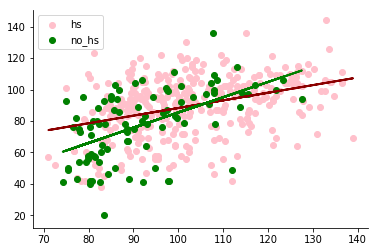

In [27]:
kidiq_hs = kidiq[kidiq.mom_hs==1]
kidiq_nohs = kidiq[kidiq.mom_hs==0]
X_hs = kidiq_hs.as_matrix(["mom_iq"])
Y_hs = kidiq_hs.as_matrix(["kid_score"])
X_nohs = kidiq_nohs.as_matrix(["mom_iq"])
Y_nohs = kidiq_nohs.as_matrix(["kid_score"])
# And we can plot the fit again:
plt.scatter(X_hs, Y_hs,  color='pink', label = 'hs')
plt.scatter(X_nohs, Y_nohs,  color='green', label = 'no_hs')
plt.plot(X_hs, est.params[0]+est.params[2]*X_hs + est.params[1] +est.params[3]*X_hs, color='darkred',
         linewidth=2)
plt.plot(X_nohs, est.params[0]+ est.params[2]*X_nohs, color='green',
         linewidth=2)
plt.legend()
sns.despine()

In [28]:
print("Both the p-value and the plot above show that the interaction term should be there to make a better prediction. The interaction term, with an coefficient of -0.48, indicates that when a kid's mom went to high school, the coefficient \t of mom_iq should be (0.97-0.48). It indicates that when the mom if a kid's mom went to high school, her iq has a \t smaller impact on kid's iq compared to when a mom didn't go to high school.")

Both the p-value and the plot above show that the interaction term should be there to make a better prediction. The interaction term, with an coefficient of -0.48, indicates that when a kid's mom went to high school, the coefficient 	 of mom_iq should be (0.97-0.48). It indicates that when the mom if a kid's mom went to high school, her iq has a 	 smaller impact on kid's iq compared to when a mom didn't go to high school.
